# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
RANDOM_SEED = 27

## Load Data

In [3]:
df = pd.read_csv("data/ObesityDataSet2.csv")
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,24,1.58,65.29,yes,no,2.03,2.74,Sometimes,no,2.00,no,1.28,1.019,no,Public_Transportation,Overweight_Level_II
1,Male,23,1.65,66.00,no,no,3.00,3.00,Sometimes,no,2.00,no,3.00,0.000,no,Public_Transportation,Normal_Weight
2,Female,21,1.69,51.26,yes,yes,3.00,3.18,Frequently,no,1.91,no,0.48,0.625,no,Public_Transportation,Insufficient_Weight
3,Female,22,1.69,65.00,yes,yes,2.00,3.00,Sometimes,no,2.00,no,1.00,1.000,Sometimes,Public_Transportation,Normal_Weight
4,Female,23,1.61,82.64,yes,yes,2.96,1.00,Sometimes,no,2.98,no,0.74,2.000,Sometimes,Public_Transportation,Obesity_Type_I


## Column Renaming

Jadi karena susah diartikan untuk nama kolomnya jadi dalam hal ini renaming dilakukan agar mempermudah mengartikan tanpa menghilangkan arti dari kolom itu sendiri.

In [4]:
df.rename(columns = {
    'Gender' : 'gender',
    'Age' : 'age',
    'Height' : 'height_m',
    'Weight' : 'weight_kg',
    'family_history_with_overweight' : 'family_overweight_history',
    'FAVC' : 'high_cal_food_freq',
    'FCVC' : 'vegetable_consumtion_freq',
    'NCP' : 'main_meal_count',
    'CAEC' : 'snack_freq',
    'SMOKE' : 'is_smoker',
    'CH2O' : 'water_intake_level',
    'SCC' : 'is_cal_monitor',
    'FAF' : 'physical_activity_freq',
    'TUE' : 'tech_use_time',
    'CALC' : 'alcohol_consumption_freq',
    'MTRANS' : 'main_transport_mode',
    'NObeyesdad' : 'obesity_level'
}, inplace = True)

In [5]:
df.head()

,gender,age,height_m,weight_kg,family_overweight_history,high_cal_food_freq,vegetable_consumtion_freq,main_meal_count,snack_freq,is_smoker,water_intake_level,is_cal_monitor,physical_activity_freq,tech_use_time,alcohol_consumption_freq,main_transport_mode,obesity_level
0,Female,24,1.58,65.29,yes,no,2.03,2.74,Sometimes,no,2.00,no,1.28,1.019,no,Public_Transportation,Overweight_Level_II
1,Male,23,1.65,66.00,no,no,3.00,3.00,Sometimes,no,2.00,no,3.00,0.000,no,Public_Transportation,Normal_Weight
2,Female,21,1.69,51.26,yes,yes,3.00,3.18,Frequently,no,1.91,no,0.48,0.625,no,Public_Transportation,Insufficient_Weight
3,Female,22,1.69,65.00,yes,yes,2.00,3.00,Sometimes,no,2.00,no,1.00,1.000,Sometimes,Public_Transportation,Normal_Weight
4,Female,23,1.61,82.64,yes,yes,2.96,1.00,Sometimes,no,2.98,no,0.74,2.000,Sometimes,Public_Transportation,Obesity_Type_I


In [6]:
df.shape

(1056, 17)

## Drop Duplicate

Selanjutnya duplicate di drop "jika ada" untuk menghindari overfitting pada model

In [7]:
df[df.duplicated()].shape

(10, 17)

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.shape

(1046, 17)

## Split Data

Jadi sebelum masuk ke EDA (Exploratory Data Analysis), splitting dilakukan agar tidak terjadi data leak.

In [10]:
df['obesity_level'].value_counts()

obesity_level
Obesity_Type_I         176
Obesity_Type_III       162
Obesity_Type_II        149
Overweight_Level_II    145
Normal_Weight          140
Overweight_Level_I     139
Insufficient_Weight    135
Name: count, dtype: int64

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X = df.drop(['obesity_level'], axis=1)
y = df['obesity_level']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED, stratify=y)

train = pd.concat([X_train, y_train], axis=1)
test = pd.concat([X_test, y_test], axis=1)

print(train.shape)
print(test.shape)

(836, 17)
(210, 17)


In [13]:
train['obesity_level'].value_counts()

obesity_level
Obesity_Type_I         141
Obesity_Type_III       129
Obesity_Type_II        119
Overweight_Level_II    116
Normal_Weight          112
Overweight_Level_I     111
Insufficient_Weight    108
Name: count, dtype: int64

In [14]:
test['obesity_level'].value_counts()

obesity_level
Obesity_Type_I         35
Obesity_Type_III       33
Obesity_Type_II        30
Overweight_Level_II    29
Overweight_Level_I     28
Normal_Weight          28
Insufficient_Weight    27
Name: count, dtype: int64

# EDA (Exploratory Data Analysis)

In [15]:
train.head()

,gender,age,height_m,weight_kg,family_overweight_history,high_cal_food_freq,vegetable_consumtion_freq,main_meal_count,snack_freq,is_smoker,water_intake_level,is_cal_monitor,physical_activity_freq,tech_use_time,alcohol_consumption_freq,main_transport_mode,obesity_level
870,Female,26,1.62,104.85,yes,yes,3.00,3.00,Sometimes,no,2.65,no,0.0,0.554,Sometimes,Public_Transportation,Obesity_Type_III
309,Female,19 years,1.50,45.00,no,yes,2.00,3.00,Sometimes,no,1.00,no,0.0,0.000,Sometimes,Public_Transportation,Normal_Weight
834,Female,23,1.66,60.00,yes,yes,2.00,1.00,Sometimes,no,1.00,no,1.0,1.000,Sometimes,Public_Transportation,Normal_Weight
252,Female,16,1.66,58.00,no,no,2.00,1.00,Sometimes,no,1.00,no,0.0,1.000,no,Walking,Normal_Weight
350,Male,17,1.81,58.83,yes,yes,2.48,3.76,Sometimes,no,2.00,no,2.0,0.930,no,Automobile,Insufficient_Weight


In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 836 entries, 870 to 345
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   gender                     836 non-null    object 
 1   age                        836 non-null    object 
 2   height_m                   836 non-null    float64
 3   weight_kg                  836 non-null    float64
 4   family_overweight_history  836 non-null    object 
 5   high_cal_food_freq         836 non-null    object 
 6   vegetable_consumtion_freq  808 non-null    float64
 7   main_meal_count            836 non-null    float64
 8   snack_freq                 836 non-null    object 
 9   is_smoker                  836 non-null    object 
 10  water_intake_level         836 non-null    float64
 11  is_cal_monitor             836 non-null    object 
 12  physical_activity_freq     836 non-null    float64
 13  tech_use_time              836 non-null    float64
 1

In [17]:
def num_cat(df):
    """
    num_cat : berfungsi untuk memisahkan antara categorical dan numerical variabel.

    df : Dataframe

    return : list numerical serta categorical variable
    """
    num = []
    cat = []

    for _ in df.columns:
        if df[_].dtype == 'object':
            cat.append(_)
        else:
            num.append(_)

    return num,cat
    
num, cat = num_cat(train) 

## Categorical Data

In [18]:
cat

['gender',
 'age',
 'family_overweight_history',
 'high_cal_food_freq',
 'snack_freq',
 'is_smoker',
 'is_cal_monitor',
 'alcohol_consumption_freq',
 'main_transport_mode',
 'obesity_level']

In [19]:
train['gender'].value_counts()

gender
Female    426
Male      410
Name: count, dtype: int64

In [20]:
train['age'].unique()

array(['26', '19 years', '23', '16', '17', '18', '27', '40', '33', '24',
       '29', '30', '19', '31', '22', '25', '21', '39', '41', '22 years',
       '34', '45', '20', '14', '35', '38', '44', '32', '37', '28',
       '17 years', '36', '23 years', '51', '48', '55', '26 years', '43',
       '36 years', '25 years', '46', '21 years', '42'], dtype=object)

In [21]:
train['age'] = train['age'].str.replace(r'\D', '', regex=True)
train['age'] = pd.to_numeric(train['age'])
train['age'].unique()

array([26, 19, 23, 16, 17, 18, 27, 40, 33, 24, 29, 30, 31, 22, 25, 21, 39,
       41, 34, 45, 20, 14, 35, 38, 44, 32, 37, 28, 36, 51, 48, 55, 43, 46,
       42])

In [22]:
test['age'] = test['age'].str.replace(r'\D', '', regex=True)
test['age'] = pd.to_numeric(test['age'])

In [23]:
train['family_overweight_history'].value_counts()

family_overweight_history
yes    690
no     146
Name: count, dtype: int64

In [24]:
train['high_cal_food_freq'].value_counts()

high_cal_food_freq
yes    742
no      94
Name: count, dtype: int64

In [25]:
train['snack_freq'].value_counts()

snack_freq
Sometimes     693
Frequently    101
Always         22
no             20
Name: count, dtype: int64

In [26]:
train['is_smoker'].value_counts()

is_smoker
no     816
yes     20
Name: count, dtype: int64

In [27]:
train['is_cal_monitor'].value_counts()

is_cal_monitor
no     794
yes     42
Name: count, dtype: int64

In [28]:
train['alcohol_consumption_freq'].value_counts()

alcohol_consumption_freq
Sometimes     552
no            257
Frequently     26
Always          1
Name: count, dtype: int64

In [29]:
train['main_transport_mode'].value_counts()

main_transport_mode
Public_Transportation    609
Automobile               174
Walking                   22
Motorbike                  8
Bike                       3
Name: count, dtype: int64

## Numerical Data

In [30]:
num

['height_m',
 'weight_kg',
 'vegetable_consumtion_freq',
 'main_meal_count',
 'water_intake_level',
 'physical_activity_freq',
 'tech_use_time']

In [31]:
train['height_m'].describe()

count    836.000000
mean       1.699079
std        0.093291
min        1.450000
25%        1.630000
50%        1.700000
75%        1.760000
max        1.950000
Name: height_m, dtype: float64

In [32]:
train['height_m'].head()

870    1.62
309    1.50
834    1.66
252    1.66
350    1.81
Name: height_m, dtype: float64

In [33]:
train['weight_kg'].describe()

count    836.000000
mean      86.482309
std       26.227455
min       39.000000
25%       65.977500
50%       82.470000
75%      107.967500
max      173.000000
Name: weight_kg, dtype: float64

In [34]:
train['weight_kg'].head()

870    104.85
309     45.00
834     60.00
252     58.00
350     58.83
Name: weight_kg, dtype: float64

In [35]:
train['vegetable_consumtion_freq'].describe()

count    808.000000
mean       2.413626
std        0.545805
min        1.000000
25%        2.000000
50%        2.380000
75%        3.000000
max        3.000000
Name: vegetable_consumtion_freq, dtype: float64

In [36]:
train['vegetable_consumtion_freq'].head()

870    3.00
309    2.00
834    2.00
252    2.00
350    2.48
Name: vegetable_consumtion_freq, dtype: float64

In [37]:
train['main_meal_count'].describe()

count    836.000000
mean       2.642978
std        0.806036
min        1.000000
25%        2.415000
50%        3.000000
75%        3.000000
max        4.000000
Name: main_meal_count, dtype: float64

In [38]:
train['main_meal_count'].head()

870    3.00
309    3.00
834    1.00
252    1.00
350    3.76
Name: main_meal_count, dtype: float64

In [39]:
train['water_intake_level'].describe()

count    836.000000
mean       1.991555
std        0.608820
min        1.000000
25%        1.530000
50%        2.000000
75%        2.432500
max        3.000000
Name: water_intake_level, dtype: float64

In [40]:
train['water_intake_level'].head()

870    2.65
309    1.00
834    1.00
252    1.00
350    2.00
Name: water_intake_level, dtype: float64

In [41]:
train['physical_activity_freq'].describe()

count    836.000000
mean       0.985658
std        0.848399
min        0.000000
25%        0.100000
50%        1.000000
75%        1.600000
max        3.000000
Name: physical_activity_freq, dtype: float64

In [42]:
train['physical_activity_freq'].head()

870    0.0
309    0.0
834    1.0
252    0.0
350    2.0
Name: physical_activity_freq, dtype: float64

In [43]:
train['tech_use_time'].describe()

count    836.000000
mean       0.647664
std        0.620272
min        0.000000
25%        0.000000
50%        0.585500
75%        1.000000
max        2.000000
Name: tech_use_time, dtype: float64

In [44]:
train['tech_use_time'].head()

870    0.554
309    0.000
834    1.000
252    1.000
350    0.930
Name: tech_use_time, dtype: float64

## Missing Values

In [45]:
def missing_values(df):
    """
    df : Dataframe
    
    return : Dataframe with missing values sum and percentage
    
    """
    missing = df.isnull().sum()
    missing_percentage = df.isnull().sum() / df.shape[0] * 100
    missing = pd.concat([missing, missing_percentage], axis=1)
    missing.columns = ['Missing Values', 'Missing Values Percentage']
    return missing[missing['Missing Values'] > 0]

In [46]:
missing_values(train)

,Missing Values,Missing Values Percentage
vegetable_consumtion_freq,28,3.349282
main_transport_mode,20,2.392344


In [47]:
missing_values(test)

,Missing Values,Missing Values Percentage
vegetable_consumtion_freq,9,4.285714
main_transport_mode,6,2.857143


# Pipeline Modelling for Preprocessing

In [48]:
train_prep = train.copy()
test_prep = test.copy()

In [49]:
train_prep.head()

,gender,age,height_m,weight_kg,family_overweight_history,high_cal_food_freq,vegetable_consumtion_freq,main_meal_count,snack_freq,is_smoker,water_intake_level,is_cal_monitor,physical_activity_freq,tech_use_time,alcohol_consumption_freq,main_transport_mode,obesity_level
870,Female,26,1.62,104.85,yes,yes,3.00,3.00,Sometimes,no,2.65,no,0.0,0.554,Sometimes,Public_Transportation,Obesity_Type_III
309,Female,19,1.50,45.00,no,yes,2.00,3.00,Sometimes,no,1.00,no,0.0,0.000,Sometimes,Public_Transportation,Normal_Weight
834,Female,23,1.66,60.00,yes,yes,2.00,1.00,Sometimes,no,1.00,no,1.0,1.000,Sometimes,Public_Transportation,Normal_Weight
252,Female,16,1.66,58.00,no,no,2.00,1.00,Sometimes,no,1.00,no,0.0,1.000,no,Walking,Normal_Weight
350,Male,17,1.81,58.83,yes,yes,2.48,3.76,Sometimes,no,2.00,no,2.0,0.930,no,Automobile,Insufficient_Weight


## Preprocessing pipeline

In [50]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, FunctionTransformer

### Numerical features

In [51]:
from model.cts import rounding, binary_encode

In [52]:
#Fixing Values
round_ft = ['vegetable_consumtion_freq', 'main_meal_count', 'tech_use_time']

In [53]:
round_ft_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')), #karena skala 
    ('rounder', FunctionTransformer(rounding))
])

In [54]:
#Ordinal Categorical Pipeline
ordinal_ft = ['snack_freq', 'alcohol_consumption_freq']
order = [['no', 'Sometimes', 'Frequently', 'Always'],
         ['no', 'Sometimes', 'Frequently', 'Always']]

In [55]:
binary_ft = ['gender', 'family_overweight_history']

In [56]:
ordinal_ft_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OrdinalEncoder(categories=order))
])

In [57]:
binary_ft_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', FunctionTransformer(binary_encode))
])

In [58]:
#Numerical Variable Pipeline
num_ft = ['age','height_m', 'weight_kg']

num_ft_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean'))
])

In [59]:
from sklearn.compose import ColumnTransformer

# Combine all pipelines
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_ft_pipeline, num_ft),
        ('binary', binary_ft_pipeline, binary_ft),
        ('round', round_ft_pipeline, round_ft),
        ('ordinal', ordinal_ft_pipeline, ordinal_ft)
        #('ohe', cat_ft_pipeline, cat_ft)
    ], remainder='drop'
)

In [60]:
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer', SimpleImputer())]),
                                 ['age', 'height_m', 'weight_kg']),
                                ('binary',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  FunctionTransformer(func=<function binary_encode at 0x7f924122f100>))]),
                                 ['gender', 'family_overweight_history']),
                                ('round',
                                 Pipeline(steps=[('imputer'...
                                                  FunctionTransformer(func=<function rounding at 0x7f926f9c8a40>))]),
                                 ['vegetable_consumtion_freq',
                                  'main_meal_count', 'tech_use_time']),
                                ('ordinal',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OrdinalEncoder(categories=[['no',
                                                                              'Sometimes',
                                                                              'Frequently',
                                                                              'Always'],
                                                                             ['no',
                                                                              'Sometimes',
                                                                              'Frequently',
                                                                              'Always']]))]),
                                 ['snack_freq', 'alcohol_consumption_freq'])])

In [61]:
train_prep.head()

,gender,age,height_m,weight_kg,family_overweight_history,high_cal_food_freq,vegetable_consumtion_freq,main_meal_count,snack_freq,is_smoker,water_intake_level,is_cal_monitor,physical_activity_freq,tech_use_time,alcohol_consumption_freq,main_transport_mode,obesity_level
870,Female,26,1.62,104.85,yes,yes,3.00,3.00,Sometimes,no,2.65,no,0.0,0.554,Sometimes,Public_Transportation,Obesity_Type_III
309,Female,19,1.50,45.00,no,yes,2.00,3.00,Sometimes,no,1.00,no,0.0,0.000,Sometimes,Public_Transportation,Normal_Weight
834,Female,23,1.66,60.00,yes,yes,2.00,1.00,Sometimes,no,1.00,no,1.0,1.000,Sometimes,Public_Transportation,Normal_Weight
252,Female,16,1.66,58.00,no,no,2.00,1.00,Sometimes,no,1.00,no,0.0,1.000,no,Walking,Normal_Weight
350,Male,17,1.81,58.83,yes,yes,2.48,3.76,Sometimes,no,2.00,no,2.0,0.930,no,Automobile,Insufficient_Weight


In [62]:
X_train_prep = preprocessor.fit_transform(train_prep.drop('obesity_level', axis=1))

In [63]:
X_train_prep[0]

array([ 26.  ,   1.62, 104.85,   0.  ,   1.  ,   3.  ,   3.  ,   1.  ,
         1.  ,   1.  ])

In [64]:
print(num_ft)
print(binary_ft)
print(round_ft)
print(ordinal_ft)

['age', 'height_m', 'weight_kg']
['gender', 'family_overweight_history']
['vegetable_consumtion_freq', 'main_meal_count', 'tech_use_time']
['snack_freq', 'alcohol_consumption_freq']


In [65]:
train_prep.head(1)

,gender,age,height_m,weight_kg,family_overweight_history,high_cal_food_freq,vegetable_consumtion_freq,main_meal_count,snack_freq,is_smoker,water_intake_level,is_cal_monitor,physical_activity_freq,tech_use_time,alcohol_consumption_freq,main_transport_mode,obesity_level
870,Female,26,1.62,104.85,yes,yes,3.0,3.0,Sometimes,no,2.65,no,0.0,0.554,Sometimes,Public_Transportation,Obesity_Type_III


### Target Encoding

In [66]:
from sklearn.preprocessing import LabelEncoder
target_le = LabelEncoder()
y_train_prep = target_le.fit_transform(train_prep['obesity_level'])
y_test_prep = target_le.fit_transform(test_prep['obesity_level'])

In [67]:
target_le.classes_

array(['Insufficient_Weight', 'Normal_Weight', 'Obesity_Type_I',
       'Obesity_Type_II', 'Obesity_Type_III', 'Overweight_Level_I',
       'Overweight_Level_II'], dtype=object)

In [68]:
X_train_prep = preprocessor.fit_transform(train_prep.drop('obesity_level', axis=1))
X_test_prep = preprocessor.transform(test_prep.drop('obesity_level', axis=1))

# Training menggunakan dua Model 

RandomForestClassifier dan XGBClassifier

In [69]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [70]:
rf = RandomForestClassifier(random_state=RANDOM_SEED)
xgb = XGBClassifier(random_state=RANDOM_SEED)

## RandomForestClassifier

In [71]:
rf.fit(X_train_prep, y_train_prep)

RandomForestClassifier(random_state=27)

In [72]:
y_pred = rf.predict(X_test_prep)

In [73]:
from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_test_prep, y_pred, target_names=target_le.classes_))


Classification Report

                     precision    recall  f1-score   support

Insufficient_Weight       0.96      0.96      0.96        27
      Normal_Weight       0.66      0.75      0.70        28
     Obesity_Type_I       0.97      0.94      0.96        35
    Obesity_Type_II       1.00      1.00      1.00        30
   Obesity_Type_III       1.00      1.00      1.00        33
 Overweight_Level_I       0.77      0.61      0.68        28
Overweight_Level_II       0.84      0.93      0.89        29

           accuracy                           0.89       210
          macro avg       0.89      0.88      0.88       210
       weighted avg       0.89      0.89      0.89       210



## XGBoostClassifier

In [74]:
xgb.fit(X_train_prep, y_train_prep)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [75]:
y_pred = xgb.predict(X_test_prep)

In [76]:
print('\nClassification Report\n')
print(classification_report(y_test_prep, y_pred, target_names=target_le.classes_))


Classification Report

                     precision    recall  f1-score   support

Insufficient_Weight       1.00      1.00      1.00        27
      Normal_Weight       0.92      0.86      0.89        28
     Obesity_Type_I       0.97      1.00      0.99        35
    Obesity_Type_II       1.00      1.00      1.00        30
   Obesity_Type_III       1.00      1.00      1.00        33
 Overweight_Level_I       0.84      0.93      0.88        28
Overweight_Level_II       1.00      0.93      0.96        29

           accuracy                           0.96       210
          macro avg       0.96      0.96      0.96       210
       weighted avg       0.96      0.96      0.96       210



# Menggabungkan Best Model dengan Pipeline

In [77]:
obes_pred = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(random_state=RANDOM_SEED))
])

In [78]:
obes_pred

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer())]),
                                                  ['age', 'height_m',
                                                   'weight_kg']),
                                                 ('binary',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   FunctionTransformer(func=<function binary_encode at 0x7f924122f100>))]),
                                                  ['gender',
                                                   'family_overweight_history']),
                                                 ('r...
                               feature_types=None, feature_weights=None,
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, ...))])

In [79]:
obes_pred.fit(train_prep.drop('obesity_level', axis=1), y_train_prep)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer())]),
                                                  ['age', 'height_m',
                                                   'weight_kg']),
                                                 ('binary',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   FunctionTransformer(func=<function binary_encode at 0x7f924122f100>))]),
                                                  ['gender',
                                                   'family_overweight_history']),
                                                 ('r...
                               feature_types=None, feature_weights=None,
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, ...))])

In [80]:
obes_y_pre = obes_pred.predict(test_prep.drop('obesity_level', axis=1))

In [81]:
print('\nClassification Report\n')
print(classification_report(y_test_prep, obes_y_pre, target_names=target_le.classes_))


Classification Report

                     precision    recall  f1-score   support

Insufficient_Weight       1.00      1.00      1.00        27
      Normal_Weight       0.92      0.86      0.89        28
     Obesity_Type_I       0.97      1.00      0.99        35
    Obesity_Type_II       1.00      1.00      1.00        30
   Obesity_Type_III       1.00      1.00      1.00        33
 Overweight_Level_I       0.84      0.93      0.88        28
Overweight_Level_II       1.00      0.93      0.96        29

           accuracy                           0.96       210
          macro avg       0.96      0.96      0.96       210
       weighted avg       0.96      0.96      0.96       210



In [82]:
import pickle as pkl
filename = 'model/mercury_pipeline.pkl'
pkl.dump(obes_pred, open(filename, 'wb'))

In [83]:
filename = 'model/target_le.pkl'
pkl.dump(target_le, open(filename, 'wb'))

### [EXTRAS] Feature Importance 

In [85]:
feature_importance = rf.feature_importances_
feature_names = [f"feature_{i}" for i in range(X_train_prep.shape[1])]

impo_df = pd.DataFrame({
    'feature': feature_names,
    'importance': feature_importance
})

top_10_feat = impo_df.sort_values('importance', ascending=False).head(10)

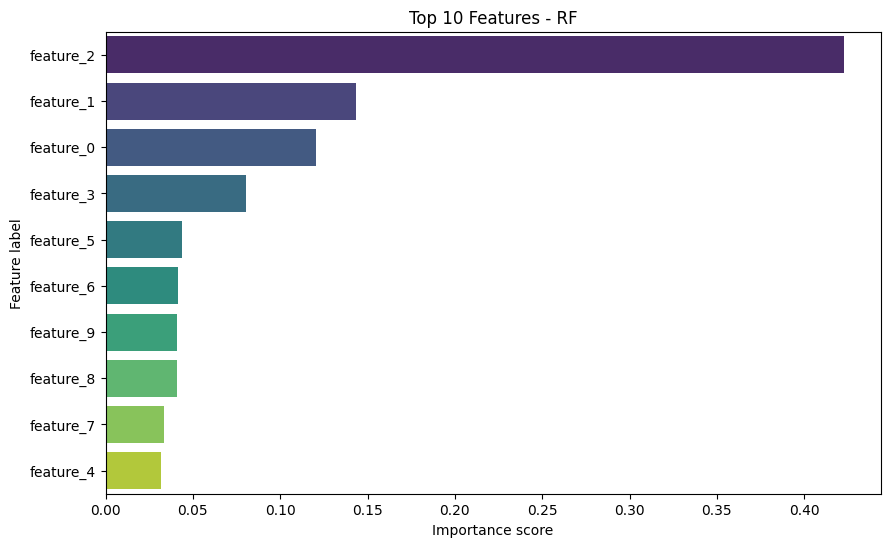

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(data=top_10_feat, x='importance', y='feature', palette='viridis')
plt.title("Top 10 Features - RF")
plt.xlabel("Importance score")
plt.ylabel("Feature label")
plt.show()